![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Author:** Niloufar Saharkhiz
***

## Overview

This project aims to provide insights for the head of Microsoft's new movie studio about successful movie types at the box office. Exploratory data analysis using data from [IMDB](https://www.imdb.com/) and [Box Office Mojo](https://www.boxofficemojo.com/) shows that the top three movie genres in terms of total gross income are Adventure, Action, and Mystery. In addition, Mystery, Documentary, and Biography movie genres have the highest average rating among all the other movie categories. The head of Microsoft movie studio can use this analysis to decide what type of films to create. 

## Business Problem

Microsoft plans to invest in creating movies based on the type of films currently successful at the box office. They may get insights into this by investigating the profit that each movie genre has made. This includes earnings from the domestic and global offices. The average rating for each movie category would also be helpful to consider.

## Data Understanding

The first data source for these analyses is the [IMDB](https://www.imdb.com/), an online database of information related to films. The data contains information for 73856 movies, including genres, average rating, and number of votes associated with each movie. The second data source is the [Box Office Mojo](https://www.boxofficemojo.com/) website which contains information on domestic gross and foreign gross for 3387 movies. The information on movie genres, average rating and gross income from domestic and international sources for the movies shared between the two databases will be used for the analysis. 

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import zipfile

%matplotlib inline

### IMDB data
The dataset from the IMDB website contains information on 73856 movies. We only use a subset of data under movie_basics and movie_ratings tables on the SQL dataset. These two tables include information on movie-id, primary title, original title, start year, runtime, genre, average rating, and number of votes. 

In [2]:
#Load IMDB dataset
zf = zipfile.ZipFile('zippedData/im.db.zip', 'r')
conn = sqlite3.connect('im.db')
q = """
SELECT * FROM movie_basics
JOIN movie_ratings
    USING (movie_id);
"""
imdb = pd.read_sql(q, conn)

In [3]:
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### Box Office Mojo (BOM) data
Box Office Mojo is a website that tracks box office revenue and is the second source for this study. The 
dataset contains information on movie titles, studios, domestic and foreign gross and year of producing of 3387 movies.

In [4]:
#Load BOM dataset
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [5]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Data Preparation


In [6]:
import code.data_preparation as dp

### Data Cleaning
The first step in data cleaning is to normalize the column names for both datasets. Then, the unnecessary columns are dropped. The `title` and `year` columns are normalized to merge two datasets and create a single dataset for feature engineering and analysis. 
Any data with missing values are excluded, and data types for numerical columns are modified to pave the way for mathematical calculations in the next step. 

### Feature Engineering
New features are created to reflect the `total_gross` income as a summation of domestic and foreign revenues and to reflect the primary genre of each movie in the combined dataset. As a result, the `full_dataset` has the shared movies between the two sources (i.e., 1303 movies) that are 1:1 merged using the `title` and `year` of the films. This dataset contains different genre features, run time, average rating, and gross income of each movie.

In [7]:
full_dataset = dp.full_clean(imdb, bom)
full_dataset.head()

,title,year,runtime[min],genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross,genre0,genre1,genre2
0,Avengers: Age Of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,459000000.0,946400000.0,1.405400e+09,Action,Adventure,Sci-Fi
1,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148,700100000.0,646900000.0,1.347000e+09,Action,Adventure,Sci-Fi
2,Star Wars: The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",7.1,462903,620200000.0,712400000.0,1.332600e+09,Action,Adventure,Fantasy
3,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",6.2,219125,417700000.0,891800000.0,1.309500e+09,Action,Adventure,Sci-Fi
4,Frozen,2013,102.0,"Adventure,Animation,Comedy",7.5,516998,400700000.0,875700000.0,1.276400e+09,Adventure,Animation,Comedy


## Analyses

In [8]:
import code.visualizations as viz

#### Most Profitable Movie Genres
The top three main movie genres with the highest total gross income are Adventure ($\$$ 282 M), Action ($\$$ 247 M), and Mystery ($\$$ 238 M). Interestingly, these genres are also on the top of the list of both domestic and foreign gross incomes. On the other hand, the movie genres with the lowest total gross income are Fantasy ($\$$ 29 M), Documentary ($\$$ 26 M), and Music ($\$$ 8 M). 

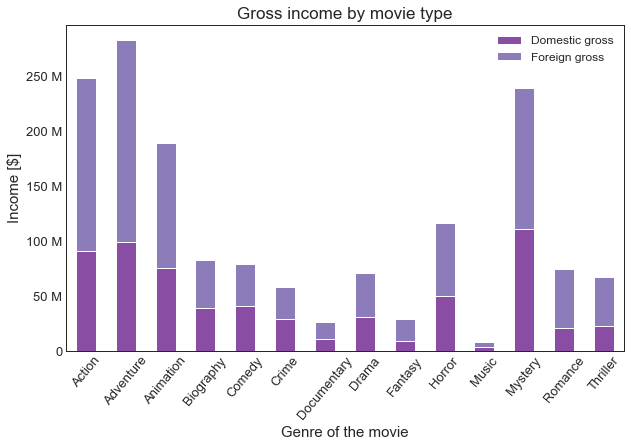

In [9]:
viz.genre_vs_income(full_dataset)

#### Highest Rating Movie Genres
Looking at the median ratings, the top three main movie genres with the highest average ratings were found to be Mystery, Documentary, and Biography. However, the number of movies with Mystery to be the main genre is lower compared to the other categories, and therefore, more investigation on movies with this main genre category is required. The movie genres with the lowest average rating were found to be Adventure, Comedy, and Horor.

No handles with labels found to put in legend.


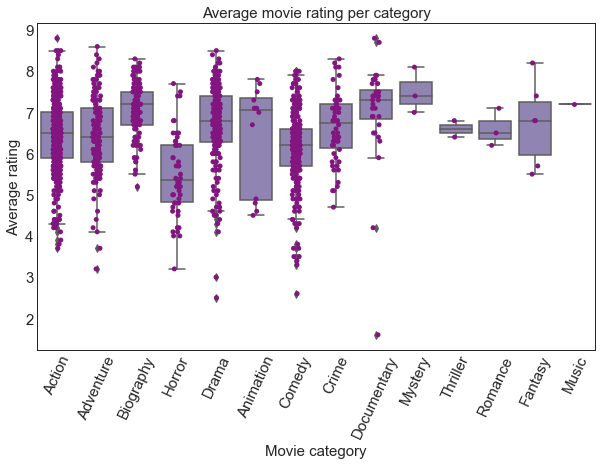

In [10]:
viz.genre_vs_rating(full_dataset)

### Best Movie Runtime

In order to investigate the impact of movie runtime on the success of the movie(in terms of total gross income and average rating), the movie runtimes were divided into five groups: very short (24-56 minutes), short (57-88 minutes), average (89-120 minutes), long (120-152 minutes), and very long(152-184 minutes). Movies with average or short runtimes were more successful in terms of total gross income. Accordingly, movies longer than 120 minutes were found to be less successful at the box office. The average rating was found to be less dependent on the movie runtime, with high average ratings to be associated with al movie runtimes. Very long or very short movies were found to have higher average ratings in general compared to the other movies.

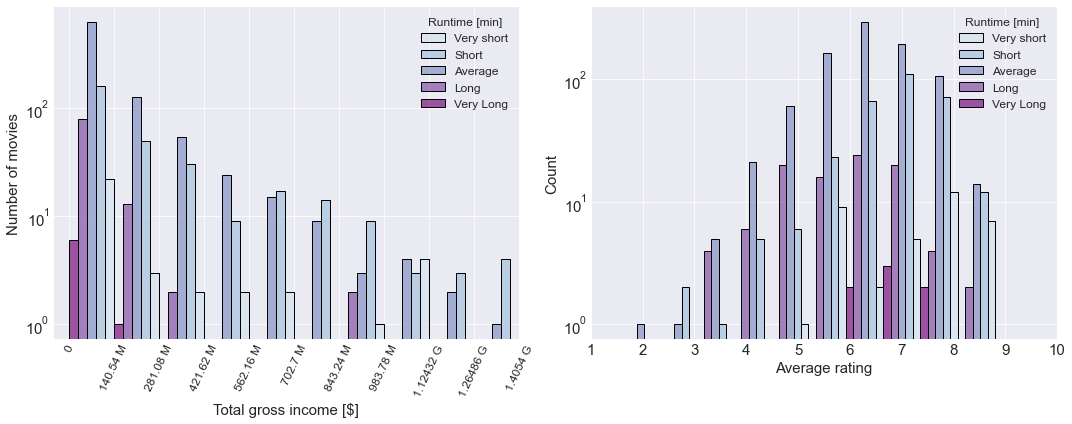

In [13]:
viz.runtime_vs_income_rating(full_dataset)

Lastly, the relationship between total gross and average ratings was investigated to understand whether a higher average rating of a movie corresponds to higher profits made out of a movie. Although some of the most profitable movies have an average rating (about 7), movies with the highest average rating movies were corresponding to the most profitable ones in general. Therefore, analysis of the movie rating could be a potential marker for understanding the success of a movie.

No handles with labels found to put in legend.


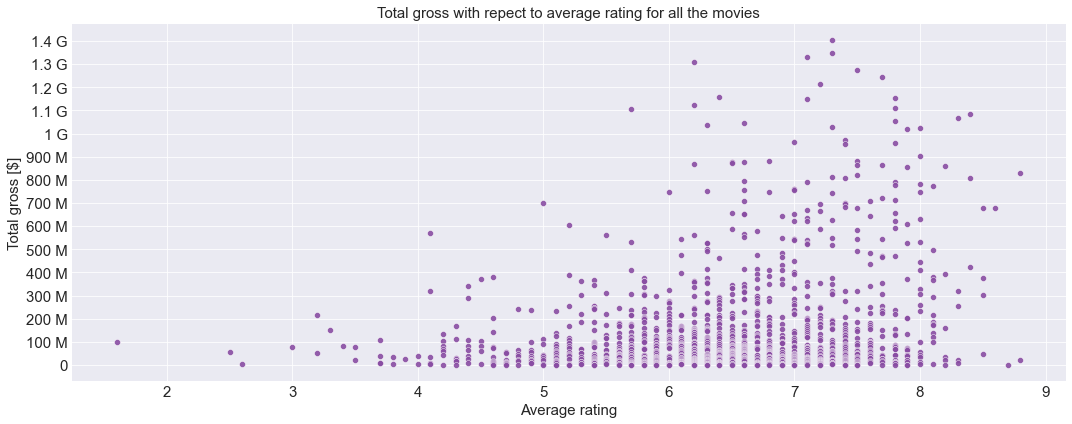

In [12]:
viz.income_vs_rating(full_dataset)

## Evaluation

The results of this study provide three recommendations for Microsoft's new movie studio to produce successful movies:
 - <b>Invest in movies with the main genre of adventure, action or mystery, for the highest gross income. </b> Previous movies with the main movie genre among these three categories have achieved the domestic and international highest gross income. 
 - <b> Invest in mystery, documentary, and biography for the highest movie rating.  </b>Although the databases include less number of movies with these three main categories compared to other ones, especially mystery and documentary, movies with these main genres have received the highest average ratings. 
 - <b> Produce movies with runtimes of less than 120 minutes. </b> Previous movies shorter than 120 minutes were associated with higher total gross income compared to longer movies. If the movies are less than 56 minutes, they might also lead to higher average ratings.
 

## Next steps

Further analyses could result in additional insights for Microsoft's new movie studio to produce a successful movie: 

- <b> Increase the number of resources: </b> The data analyses were performed using two movie data sources, [IMDB](https://www.imdb.com/) and [Box Office Mojo](https://www.boxofficemojo.com/), which are limited in terms of number of movies and relevant information. Additional sources such as [Rotten tomatoes](https://www.rottentomatoes.com), [TheMovieDB](https://www.themoviedb.org), and [The Numbers](https://www.the-numbers.com) would strengthen the analyses.
- <b> Investigate the other genres that the movies are classified under: </b> The analyses of this study were based on the main genre of the movie. However, some movies were categorized under more than one genre and therefore, it could be informative to consider the remaining genres as well. 

- <b> Study the impact of other factors such as the production studio or production team: </b> The success of the past movies was investigated by analyzing the impact of the main genre of the movies and their runtime on their gross income and average rating. The production studio and team also play an important role in the success of the movie according to their reputation, advertisements and marketing costs that were not taken into account for this study. 